In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
print(os.listdir("/content/drive/My Drive/BelajarML"))

['colab', '.ipynb_checkpoints', 'dataset']


In [6]:
import pandas as pd
import numpy as np
import re

In [ ]:
Labeling

In [14]:
dataset_path = "/content/drive/My Drive/BelajarML/dataset/pararius"
files = os.listdir(dataset_path)

data_frames = []

for file in files:
    if file.endswith(".csv"):
        try:
            full_path = os.path.join(dataset_path, file)
            df_temp = pd.read_csv(full_path)

            city_name = file.split("_")[0].capitalize()
            df_temp["City"] = city_name

            data_frames.append(df_temp)
            print(f"berhasil membaca file {file}")

        except Exception as e:
            print(f"gagal membaca file {file}")
            print(e)

if len(data_frames) > 0:
    df = pd.concat(data_frames, ignore_index=True)

    len_before = len(df)
    df = df.drop_duplicates(subset=["Name", "Location", "Price"])
    len_deleted = len_before - len(df)

    print(f"total data duplikat yang dihapus = {len_deleted} data")

    df = df[~df["Price"].astype(str).str.contains("Price on request", na=False)]

    print("\nPreview:")
    display(df.head())

else:
    print("tidak ada file yang bisa dibaca")

berhasil membaca file delft_Pararius.csv
berhasil membaca file denhaag_Pararius.csv
berhasil membaca file utrecht_Pararius.csv
berhasil membaca file amsterdam_Pararius.csv
berhasil membaca file eindhoven_Pararius.csv
berhasil membaca file groningen_Pararius.csv
berhasil membaca file rotterdam_Pararius.csv
total data duplikat yang dihapus = 121 data

Preview:


,Name,Location,Price,Area,Rooms,Interior,City
0,Flat Theodora Eigemanpad,2625 DZ Delft (Reinier de Graafbuurt),"€1,619 per month",89 m²,3 rooms,NaN,Delft
1,Flat Martinus Nijhofflaan,2624 MH Delft (Poptahof-Zuid),"€1,695 per month",76 m²,3 rooms,Upholstered,Delft
2,House Laan van Van der Gaag,2627 BS Delft (Delftzicht),"€2,400 per month",97 m²,4 rooms,Furnished,Delft
3,Flat Kromstraat,2611 ER Delft (Centrum),"€1,265 per month",70 m²,2 rooms,Upholstered,Delft
4,Flat Arthur van Schendelplein 173,2624 CX Delft (Voorhof-Hoogbouw),"€1,495 per month",94 m²,4 rooms,NaN,Delft


Cleaning Data

In [18]:
def clean_price(value):
  if pd.isna(value): return None

  value = str(value).replace('€', '').replace(',', '').replace('per month', '').strip()

  numbers = re.findall(r'\d+', value)
  return int(numbers[0]) if numbers else None

df['Price'] = df['Price'].apply(clean_price)

display(df.head())


,Name,Location,Price,Area,Rooms,Interior,City,price
0,Flat Theodora Eigemanpad,2625 DZ Delft (Reinier de Graafbuurt),1619,89 m²,3 rooms,NaN,Delft,1619
1,Flat Martinus Nijhofflaan,2624 MH Delft (Poptahof-Zuid),1695,76 m²,3 rooms,Upholstered,Delft,1695
2,House Laan van Van der Gaag,2627 BS Delft (Delftzicht),2400,97 m²,4 rooms,Furnished,Delft,2400
3,Flat Kromstraat,2611 ER Delft (Centrum),1265,70 m²,2 rooms,Upholstered,Delft,1265
4,Flat Arthur van Schendelplein 173,2624 CX Delft (Voorhof-Hoogbouw),1495,94 m²,4 rooms,NaN,Delft,1495


In [25]:
def clean_number(value):
  if pd.isna(value): return None


  value = str(value)
  numbers = re.findall(r'\d+', value)
  return int(numbers[0]) if numbers else None

df['Area'] = df['Area'].apply(clean_number)
df['Rooms'] = df['Rooms'].apply(clean_number)

df['Property_type'] = df['Name'].apply(lambda x: x.split()[0] if isinstance(x, str) else "Unknown")

type_mapping = {
    'Flat': 'Apartment',
    'Apartment': 'Apartment',
    'House': 'House',
    'Studio': 'Studio',
    'Room': 'Room'
}

df['Property_type'] = df['Property_type'].map(type_mapping).fillna('Other')

interior_mapping = {
    'Shell': 0,
    'Unknown': 1,
    'Upholstered': 1,
    'Furnished': 2,
    'Furnished or Upholstered': 2,
}

df['Interior'] = df['Interior'].map(interior_mapping).fillna(1).astype(int)

display(df.head())

,Name,Location,Price,Area,Rooms,Interior,City,price,Property_type
0,Flat Theodora Eigemanpad,2625 DZ Delft (Reinier de Graafbuurt),1619,89,3,1,Delft,1619,Apartment
1,Flat Martinus Nijhofflaan,2624 MH Delft (Poptahof-Zuid),1695,76,3,1,Delft,1695,Apartment
2,House Laan van Van der Gaag,2627 BS Delft (Delftzicht),2400,97,4,2,Delft,2400,House
3,Flat Kromstraat,2611 ER Delft (Centrum),1265,70,2,1,Delft,1265,Apartment
4,Flat Arthur van Schendelplein 173,2624 CX Delft (Voorhof-Hoogbouw),1495,94,4,1,Delft,1495,Apartment


In [27]:
df.to_csv("/content/drive/My Drive/BelajarML/dataset/pararius/pararius_cleandataset.csv", index=False)

In [29]:
df_final = df[['City', 'Property_type', 'Area', 'Rooms', 'Interior', 'Price']]

display(df_final.head())

,City,Property_type,Area,Rooms,Interior,Price
0,Delft,Apartment,89,3,1,1619
1,Delft,Apartment,76,3,1,1695
2,Delft,House,97,4,2,2400
3,Delft,Apartment,70,2,1,1265
4,Delft,Apartment,94,4,1,1495


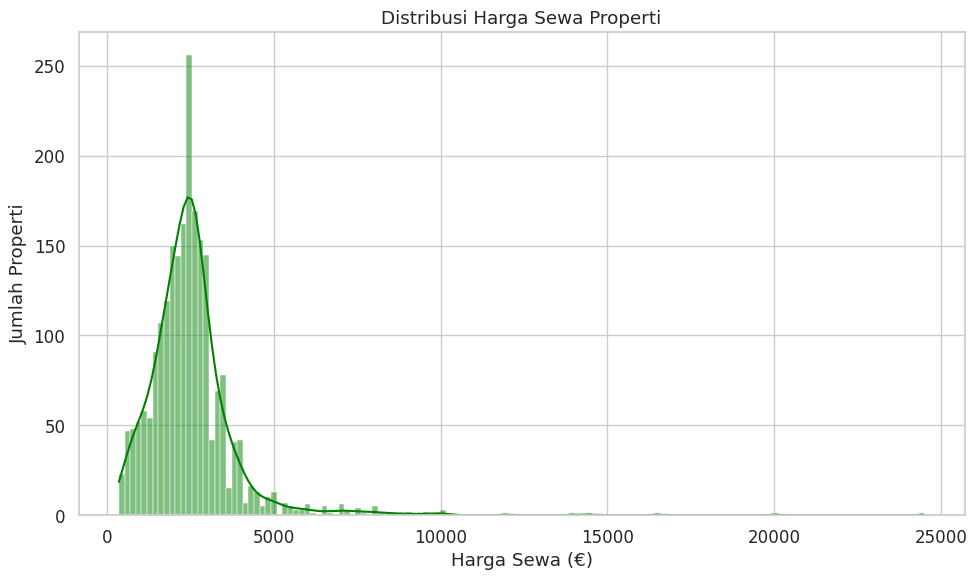

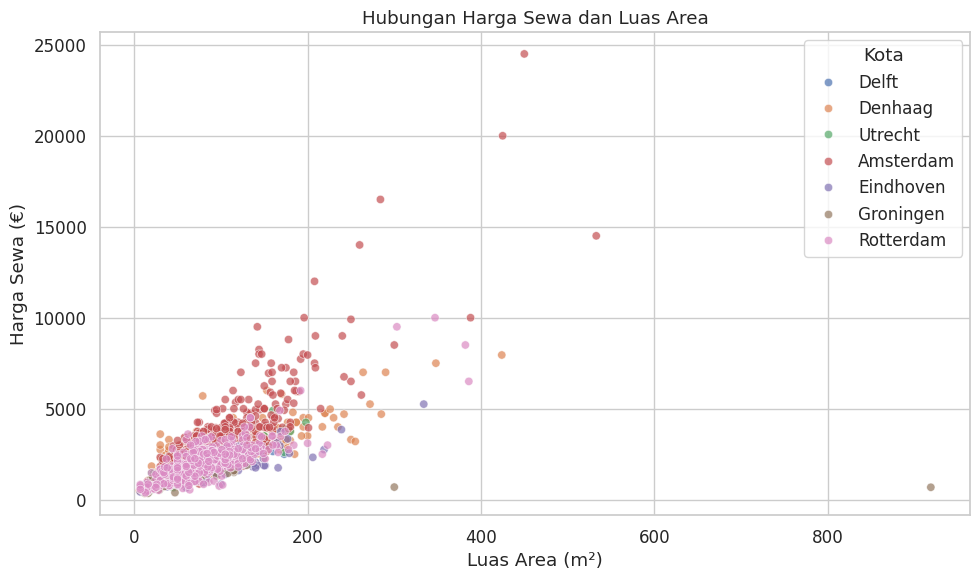

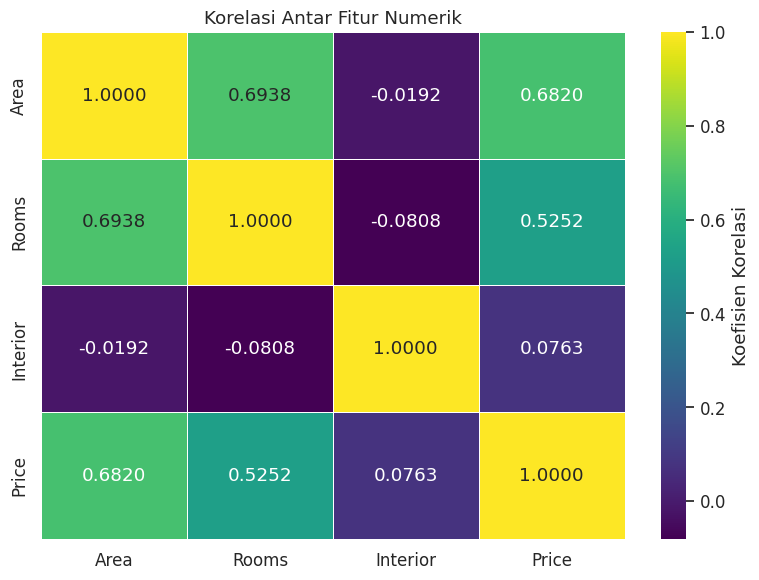

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(10, 6))
sns.histplot(
    df_final["Price"],
    kde=True,
    color="Green",
)
plt.title("Distribusi Harga Sewa Properti")
plt.xlabel("Harga Sewa (€)")
plt.ylabel("Jumlah Properti")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_final,
    x="Area",
    y="Price",
    hue="City",
    alpha=0.7
)
plt.title("Hubungan Harga Sewa dan Luas Area")
plt.xlabel("Luas Area (m²)")
plt.ylabel("Harga Sewa (€)")
plt.legend(title="Kota")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
corr = df_final.select_dtypes(include="number").corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".4f",
    cmap="viridis",
    linewidths=0.5,
    cbar_kws={"label": "Koefisien Korelasi"}
)
plt.title("Korelasi Antar Fitur Numerik")
plt.tight_layout()
plt.show()
